In [18]:
import pandas as pd


data = pd.read_csv('../networks/data/global_before_1850.csv', index_col=[0])
data = data[data['meta_occupation']!='theologian']

data = data[['wikidata_id', 'individual_name', 'region_name', 'birthyear']].drop_duplicates()
data['decade'] = data['birthyear'].apply(lambda x : int(x/10)*10)

df = data.groupby(['region_name', 'decade'])['wikidata_id'].count().reset_index()
df = df[df['decade']<1850]

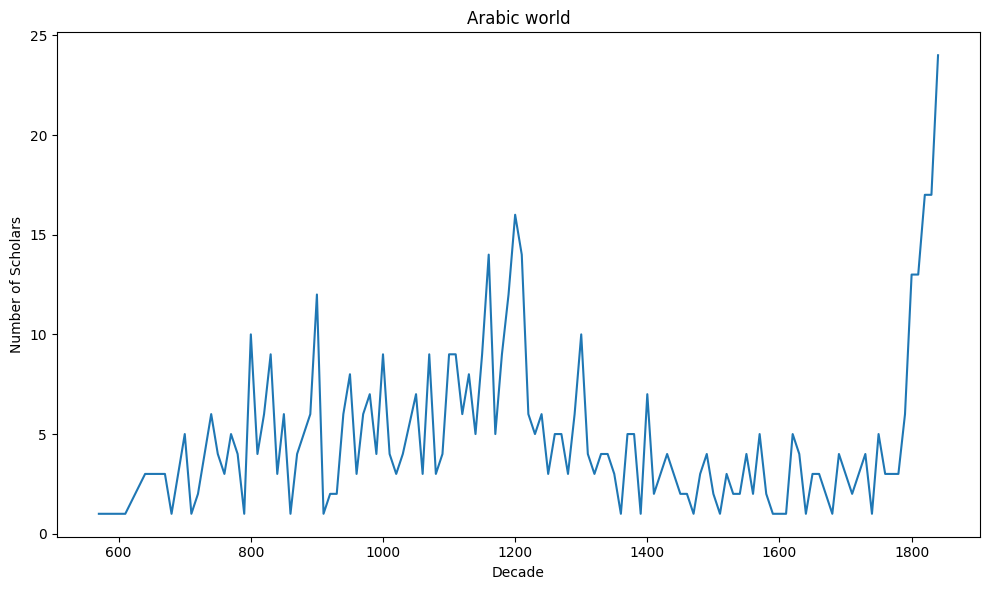

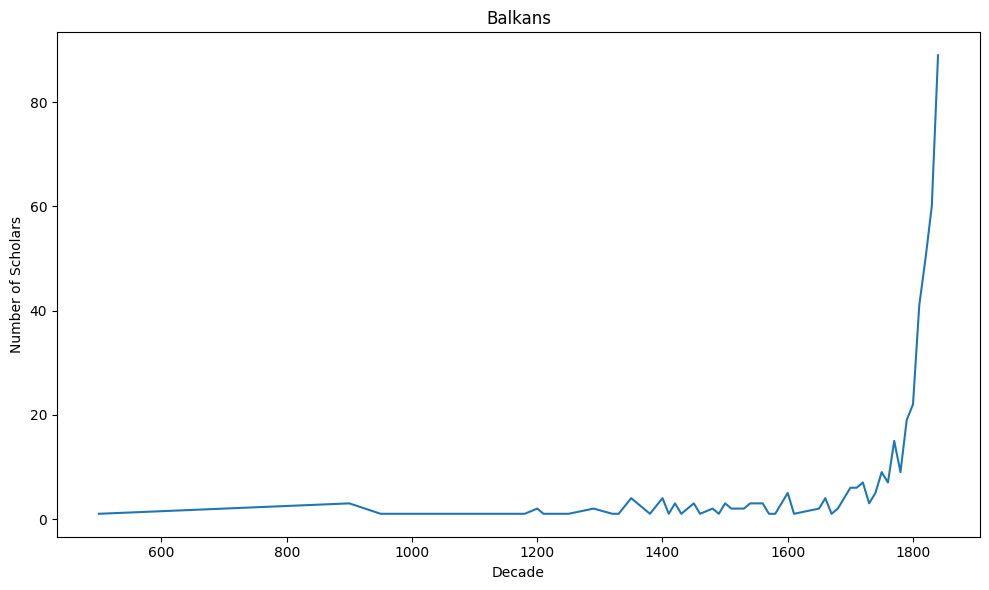

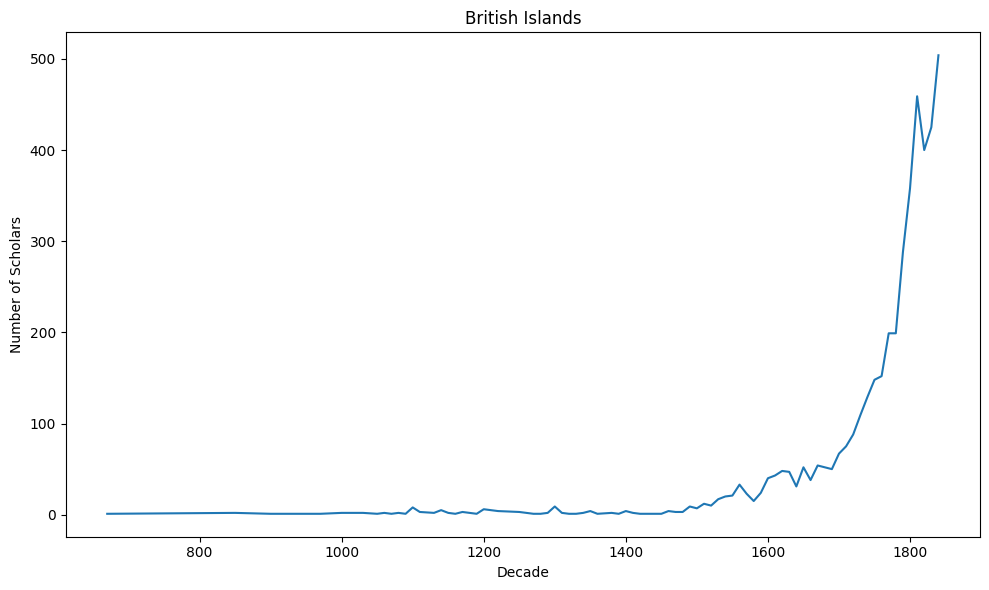

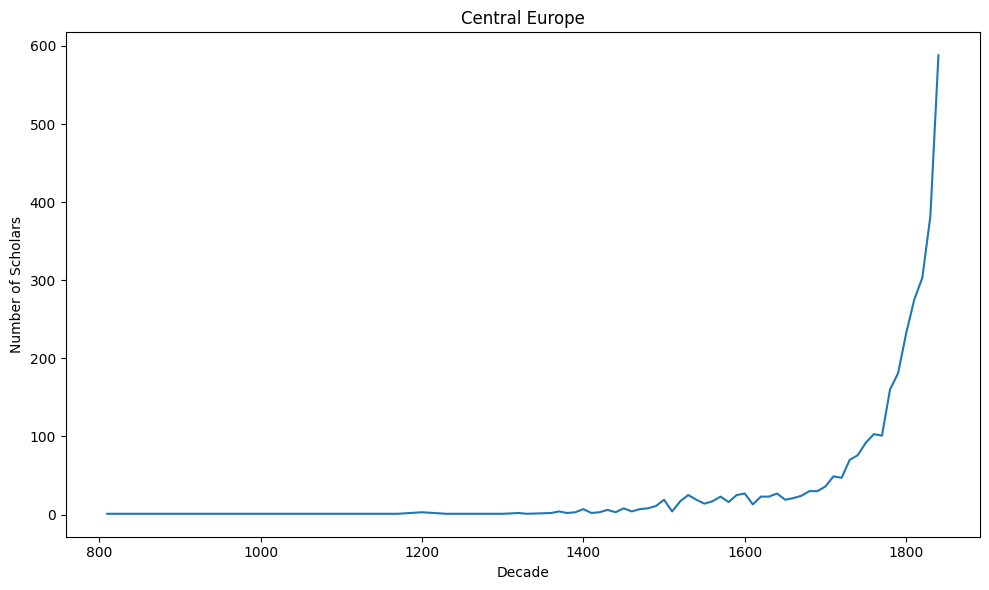

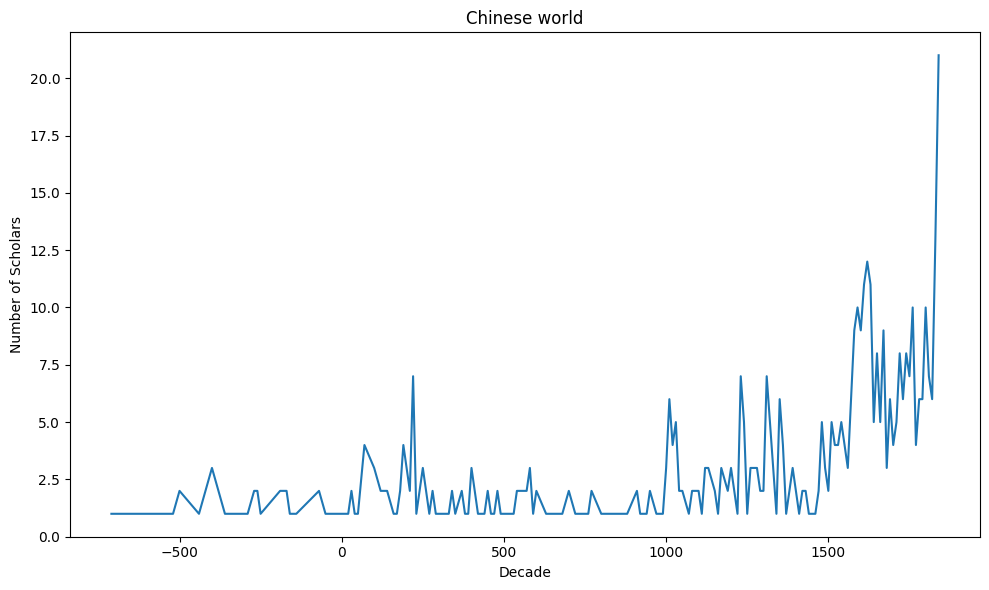

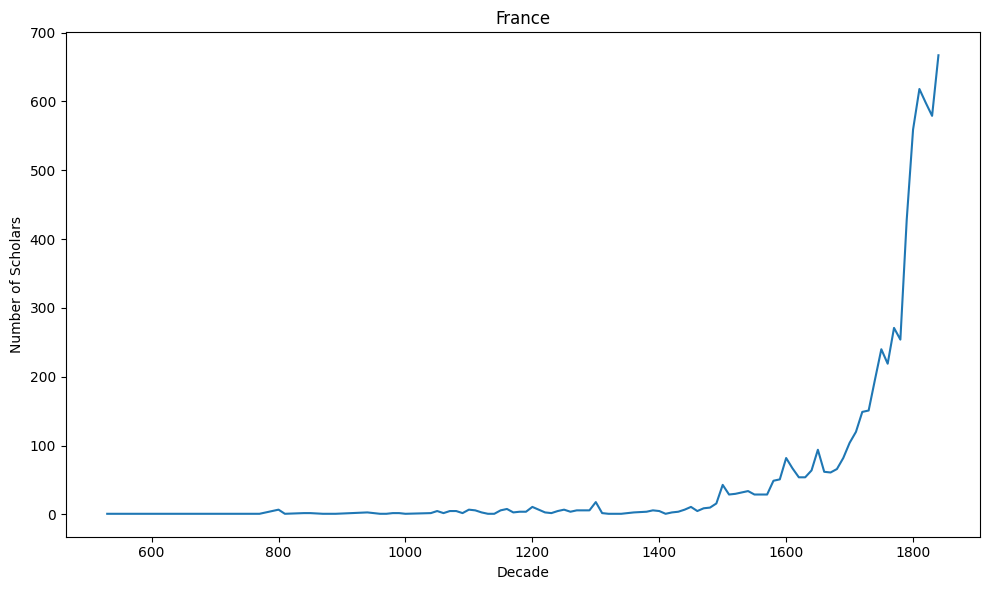

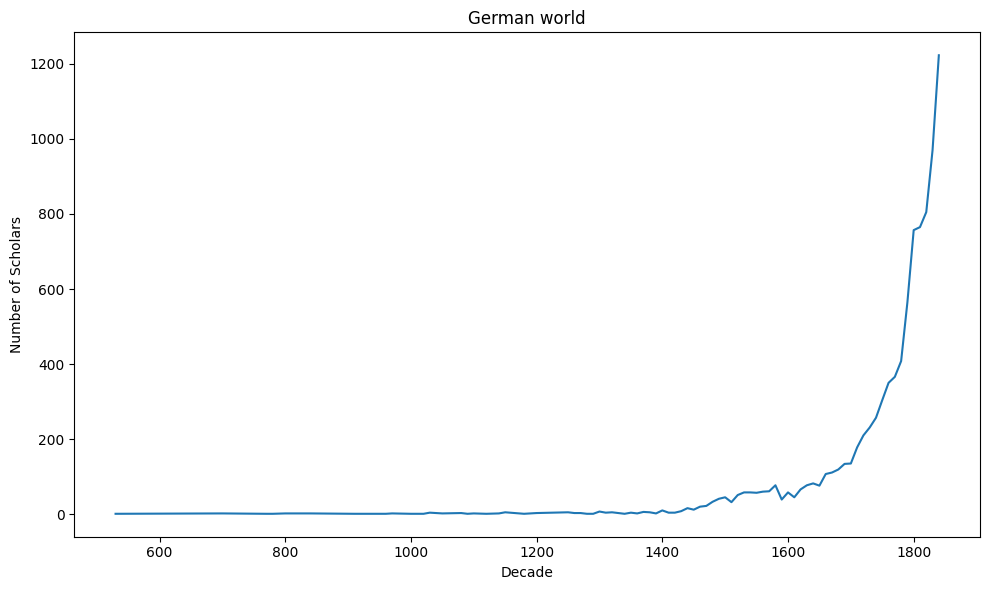

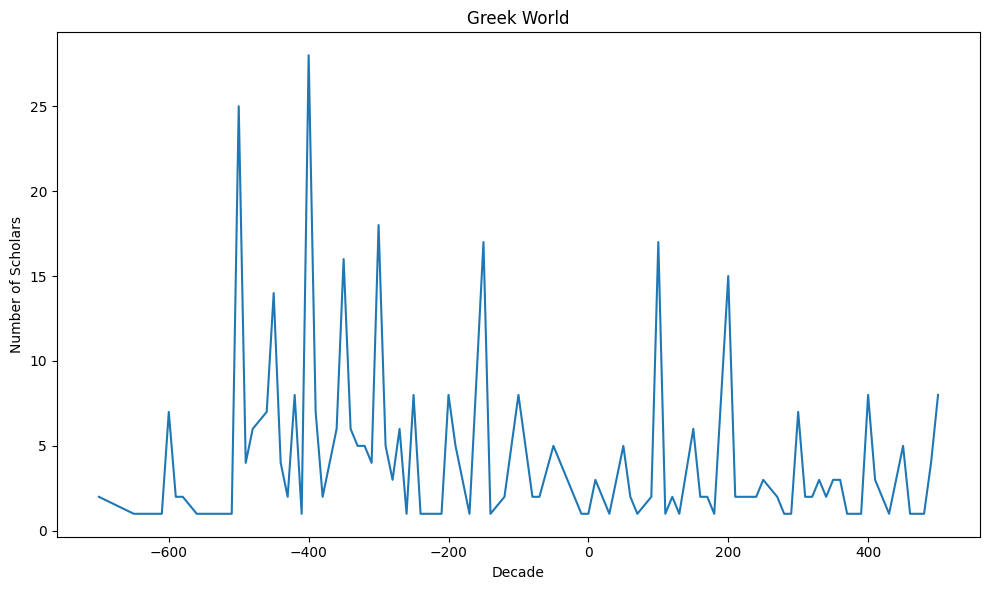

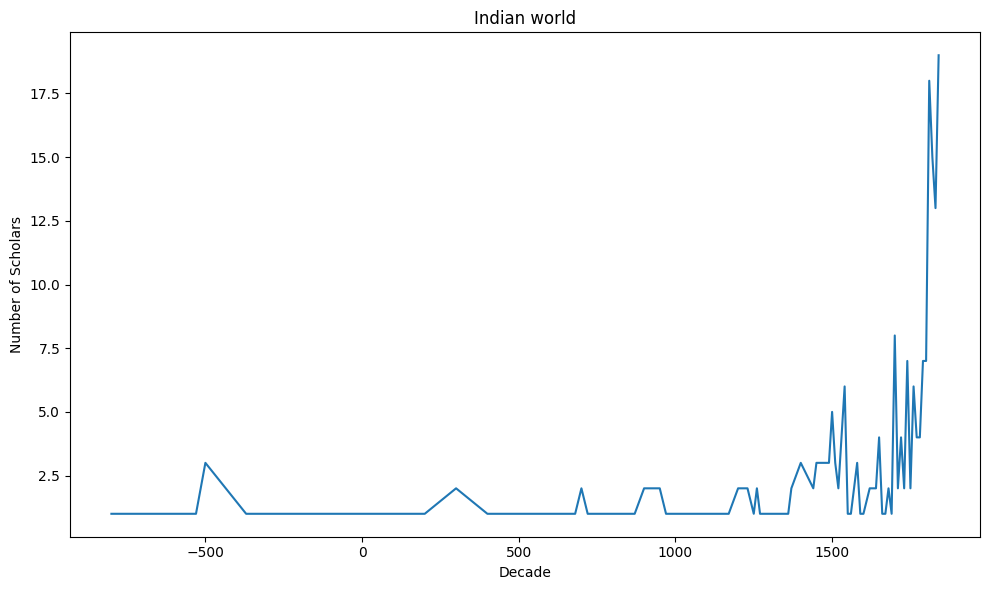

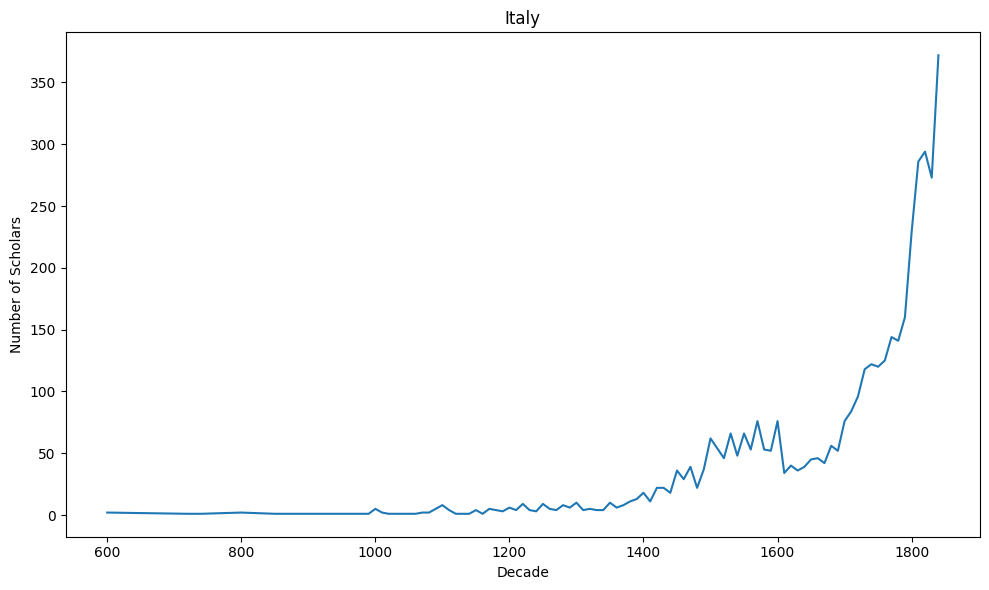

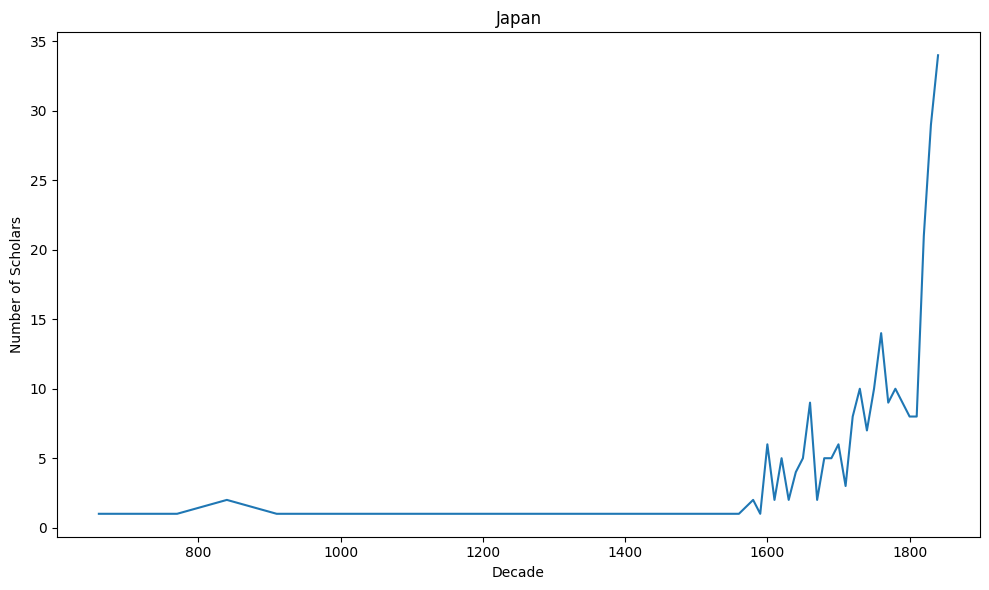

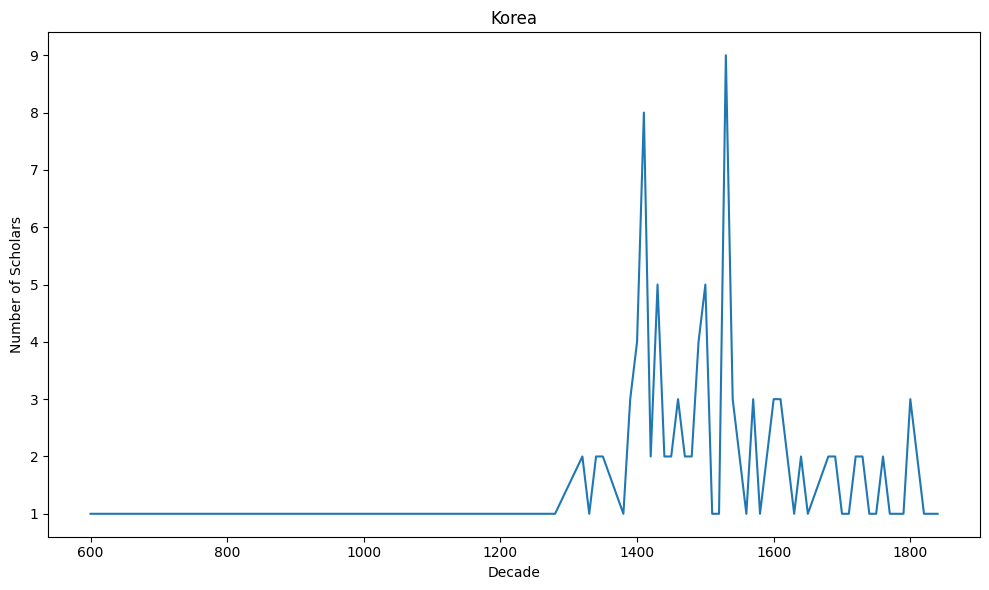

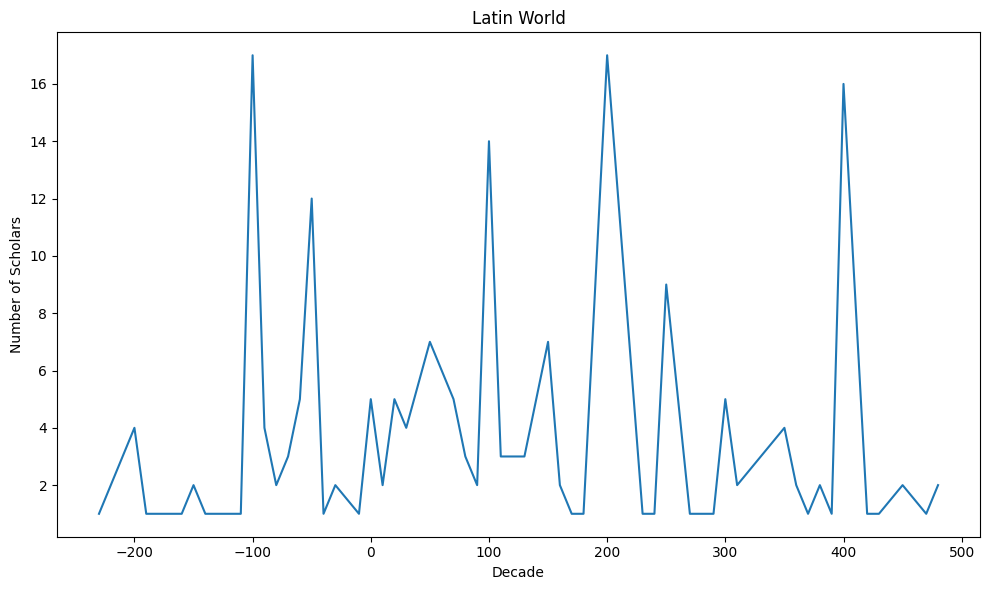

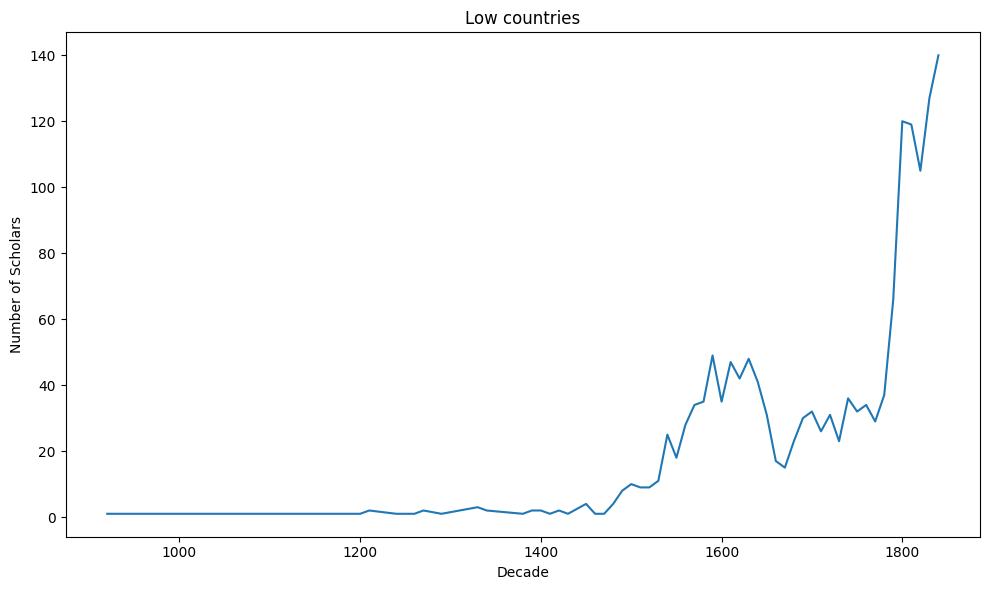

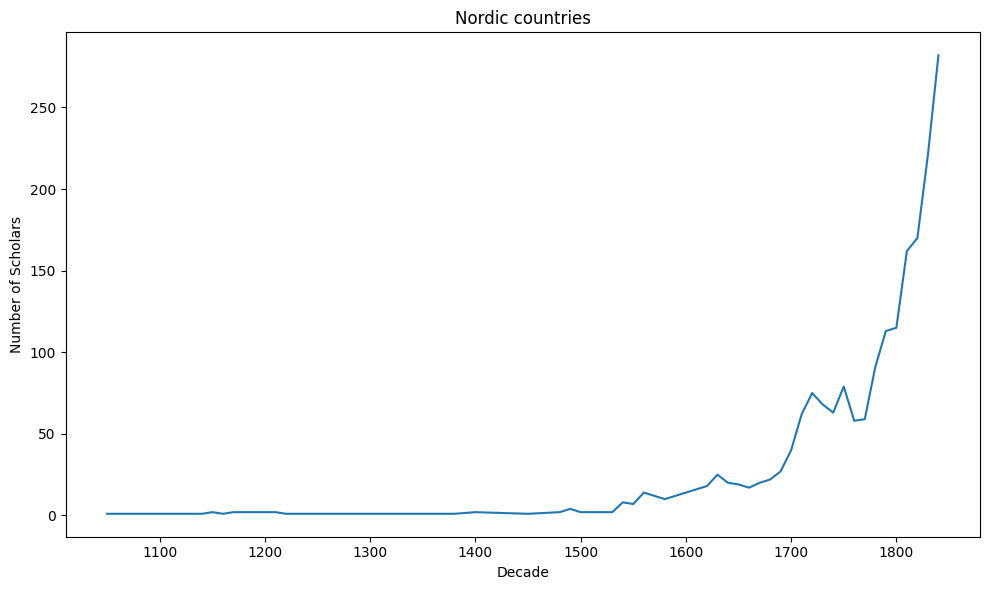

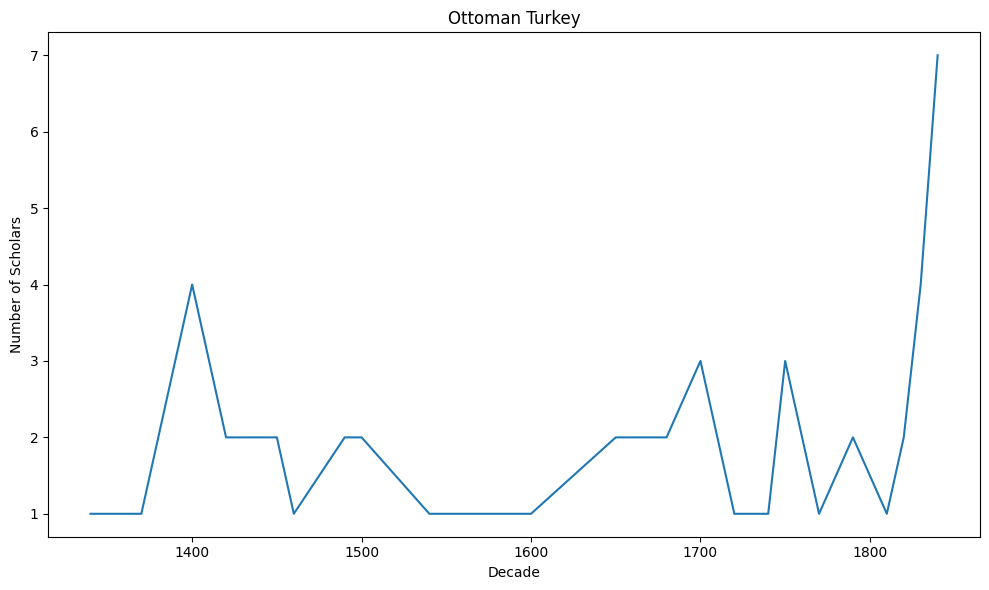

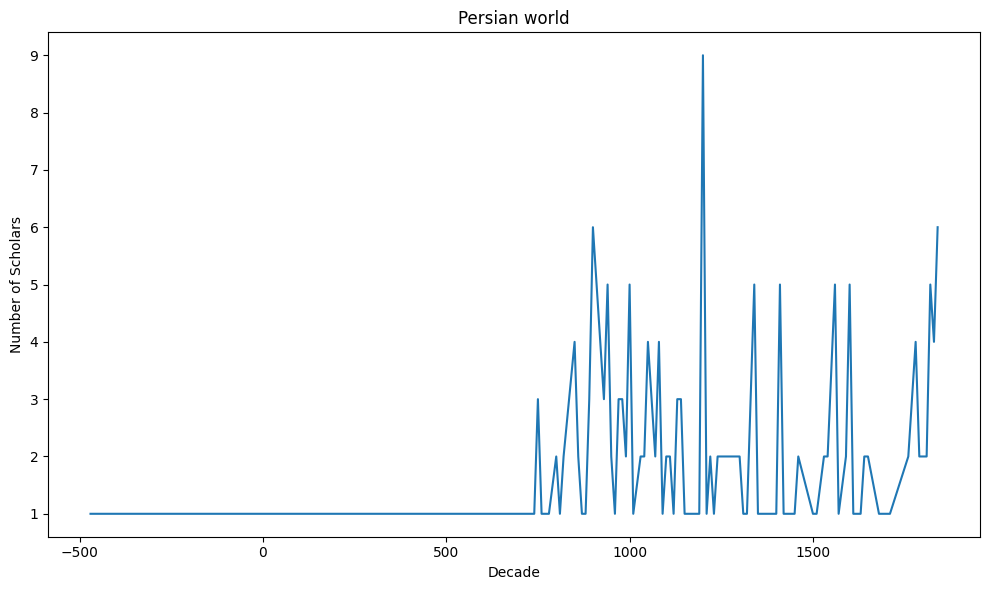

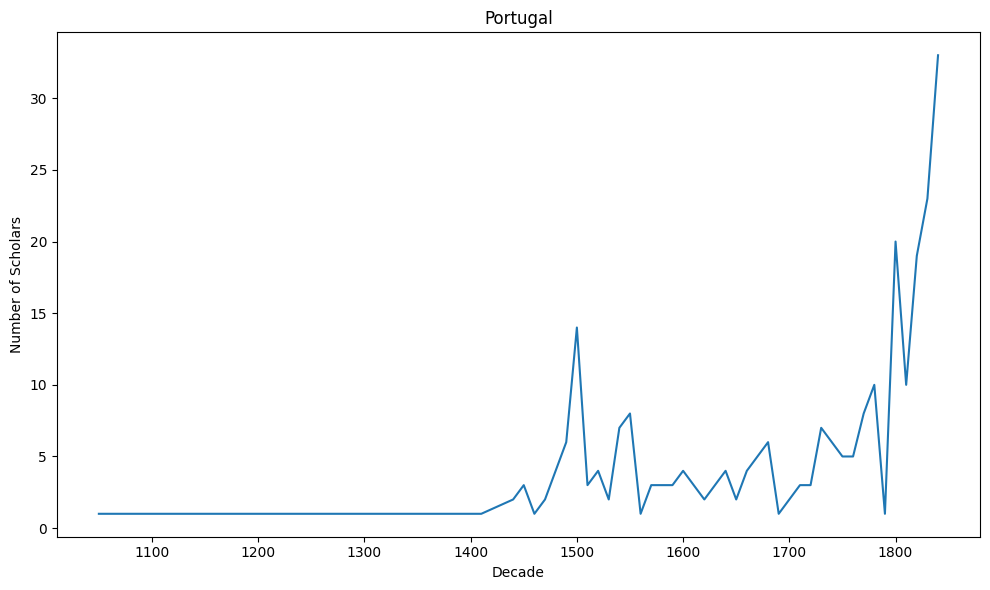

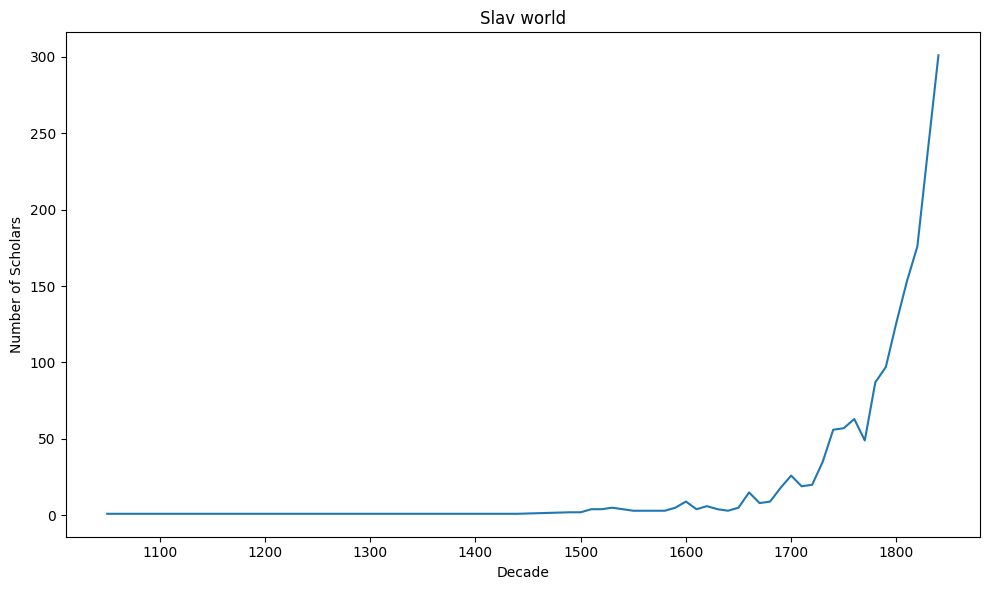

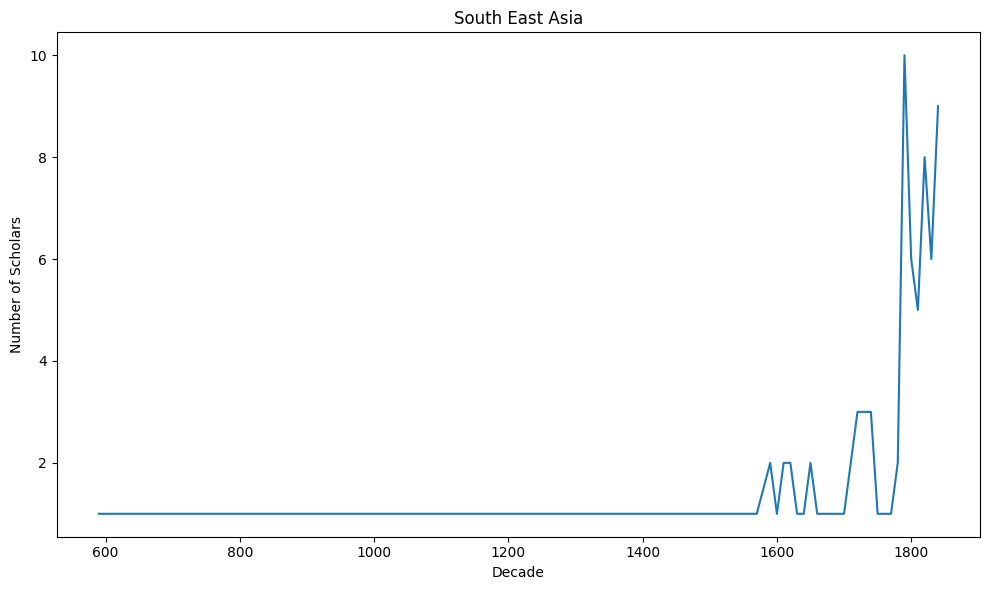

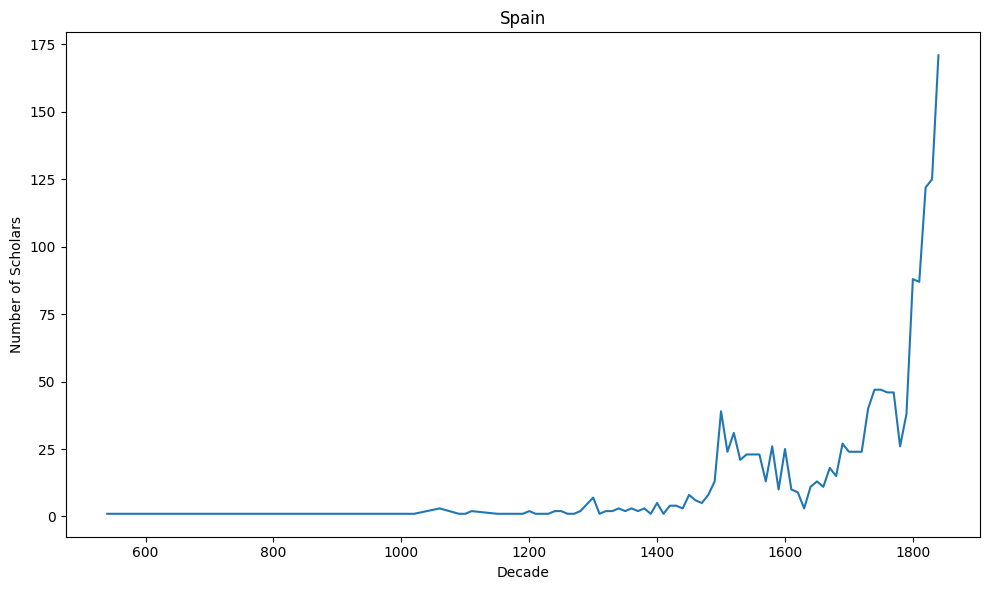

In [19]:
import matplotlib.pyplot as plt

# Assuming you have your data stored in a DataFrame named 'df'
# Create a separate graph for each region
regions = df['region_name'].unique()

for region in regions:
    region_data = df[df['region_name'] == region]
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(region_data['decade'], region_data['wikidata_id'],  linestyle='-')
    plt.title(f'{region}')
    plt.xlabel('Decade')
    plt.ylabel('Number of Scholars')
    plt.tight_layout()  # Adjust layout to prevent clipping labels
    plt.savefig(f'scholars_time/{region}.png')
    plt.show()